<a href="https://colab.research.google.com/github/anikashaji/Data-Science-Projects/blob/main/Entertainer_Data_Analysis_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

file_path = '/content/Entertainers data.csv'
# Try reading the file with different encodings
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1')  # Or 'ISO-8859-1'

# Now you can continue with your data analysis


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entertainer                                   70 non-null     object 
 1   Gender (traditional)                          70 non-null     object 
 2   Birth Year                                    70 non-null     int64  
 3   Decade of Birth                               70 non-null     object 
 4   Year of Breakthrough/#1 Hit/Award Nomination  70 non-null     int64  
 5   Breakthrough Name                             70 non-null     object 
 6   Year of First Oscar/Grammy/Emmy               64 non-null     float64
 7   Career Duration                               70 non-null     int64  
 8   Year of Last Major Work (arguable)            70 non-null     int64  
 9   Age at Death                                  30 non-null     float

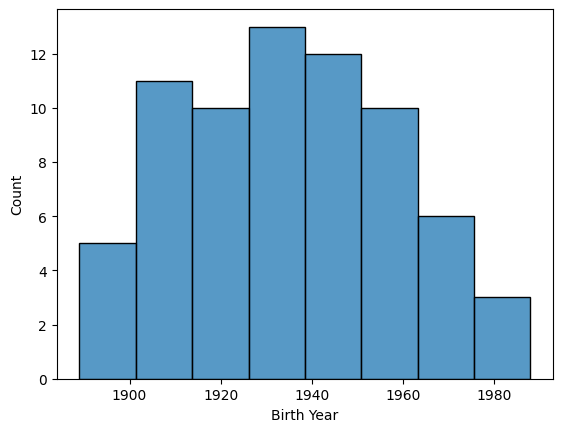

In [ ]:
# Display basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize distributions
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Birth Year'])
plt.show()


In [ ]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Correct inconsistencies
# For example, converting data types, fixing incorrect values, etc.


In [ ]:
# Display the first few rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Display the last few rows of the DataFrame
print("\nLast 5 rows of the DataFrame:")
print(df.tail())

# Get a concise summary of the DataFrame including column data types and missing values
print("\nInfo about the DataFrame:")
print(df.info())

# Get summary statistics for numerical columns in the DataFrame
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Get the data types of each column in the DataFrame
print("\nData types of each column:")
print(df.dtypes)


First 5 rows of the DataFrame:
       Entertainer Gender (traditional)  Birth Year Decade of Birth  \
0            Adele                    F        1988           1980s   
1   Angelina Jolie                    F        1975           1970s   
2  Aretha Franklin                    F        1942           1940s   
3      Bette Davis                    F        1908           1900s   
4      Betty White                    F        1922           1920s   

   Year of Breakthrough/#1 Hit/Award Nomination  \
0                                          2008   
1                                          1999   
2                                          1967   
3                                          1934   
4                                          1952   

                          Breakthrough Name  Year of First Oscar/Grammy/Emmy  \
0                                        19                           2009.0   
1                         Girl, Interrupted                           1999.

In [ ]:
# Group data by 'Gender' and calculate the mean of 'Age' for each group
df_grouped = df.groupby('Gender (traditional)')['Age'].mean()


In [ ]:
# Create a pivot table to calculate the mean age for each combination of 'Gender' and 'Survival Status'
pivot_table = df.pivot_table(index='Gender (traditional)', columns='Survival Status (Alive/Deceased):', values='Age', aggfunc='mean')


In [ ]:
# Filter rows based on a condition
df_filtered = df[df['Age'] > 30]

# Create a new column based on existing columns
df['Age_Category'] = pd.cut(df['Age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Elderly'])

# Reshape the DataFrame using stack/unstack methods
stacked_df = df.stack()


In [ ]:
# Display the resulting DataFrame or pivot table
print(df_grouped)
print(pivot_table)
print(df_filtered)


Gender (traditional)
F    83.7
M    90.3
Name: Age, dtype: float64
Survival Status (Alive/Deceased):      Alive    Deceased
Gender (traditional)                                    
F                                  67.250000  108.375000
M                                  78.035714  105.909091
        Entertainer Gender (traditional)  Birth Year Decade of Birth  \
0             Adele                    F        1988           1980s   
1    Angelina Jolie                    F        1975           1970s   
2   Aretha Franklin                    F        1942           1940s   
3       Bette Davis                    F        1908           1900s   
4       Betty White                    F        1922           1920s   
..              ...                  ...         ...             ...   
65        Tom Hanks                    M        1956           1950s   
66     Tony Bennett                    M        1926           1920s   
67     Wayne Newton                    M        1942     

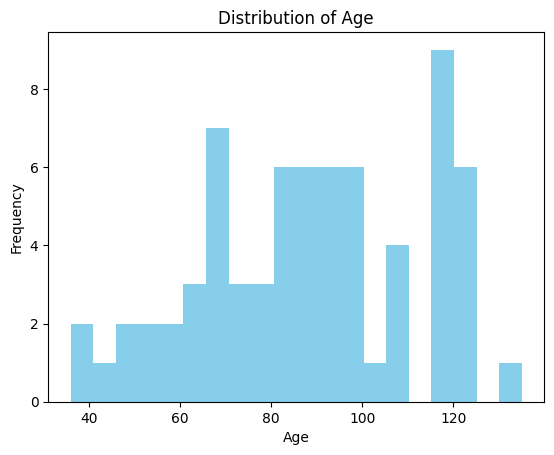

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'Age' column
plt.hist(df['Age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


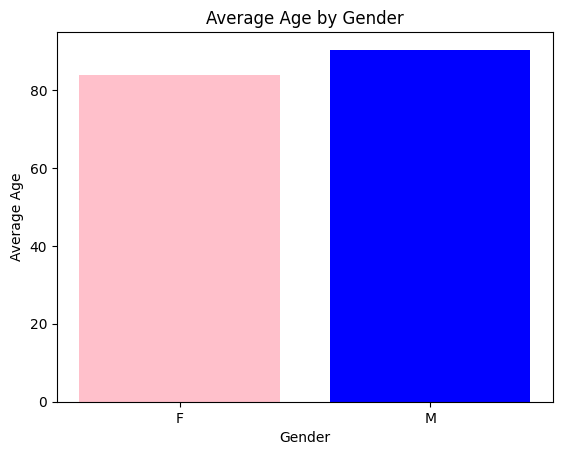

In [ ]:
# Plot a bar plot of the average age by gender
plt.bar(df['Gender (traditional)'].unique(), df.groupby('Gender (traditional)')['Age'].mean(), color=['pink', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.title('Average Age by Gender')
plt.show()


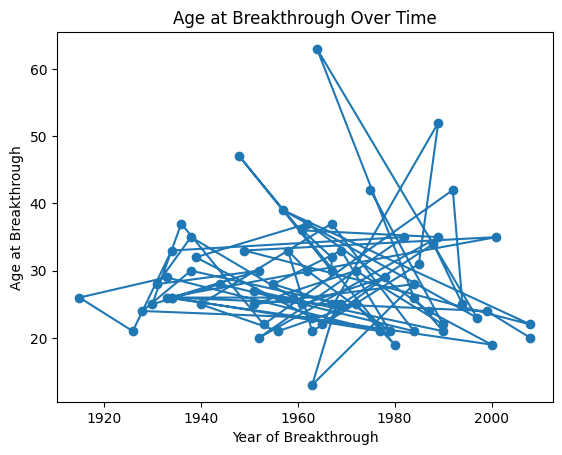

In [ ]:
# Plot a line plot of 'Year of Breakthrough' vs 'Age at Breakthrough'
plt.plot(df['Year of Breakthrough/#1 Hit/Award Nomination'], df['Age at Breakthrough'], marker='o', linestyle='-')
plt.xlabel('Year of Breakthrough')
plt.ylabel('Age at Breakthrough')
plt.title('Age at Breakthrough Over Time')
plt.show()


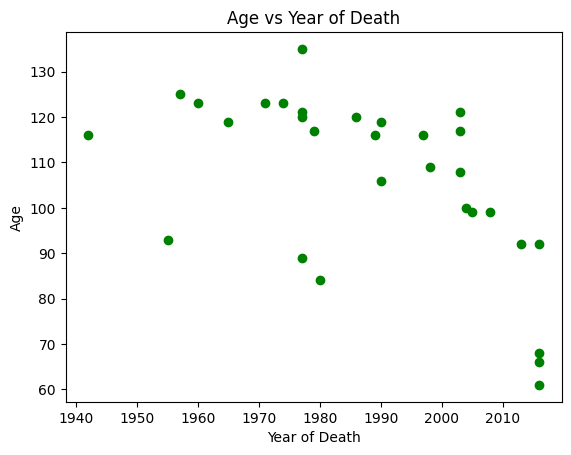

In [ ]:
# Plot a scatter plot of 'Age' vs 'Year of Death'
plt.scatter(df['Year of Death'], df['Age'], color='green')
plt.xlabel('Year of Death')
plt.ylabel('Age')
plt.title('Age vs Year of Death')
plt.show()


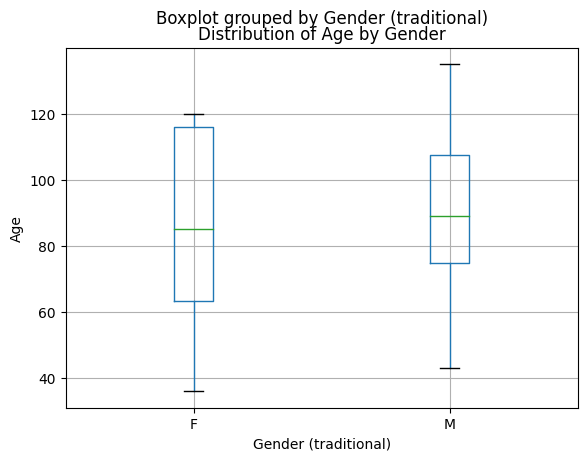

In [ ]:
# Plot a box plot of 'Age' by 'Gender'
df.boxplot(column='Age', by='Gender (traditional)')
plt.ylabel('Age')
plt.title('Distribution of Age by Gender')
plt.show()


<ipython-input-37-1f57b5c3f684>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


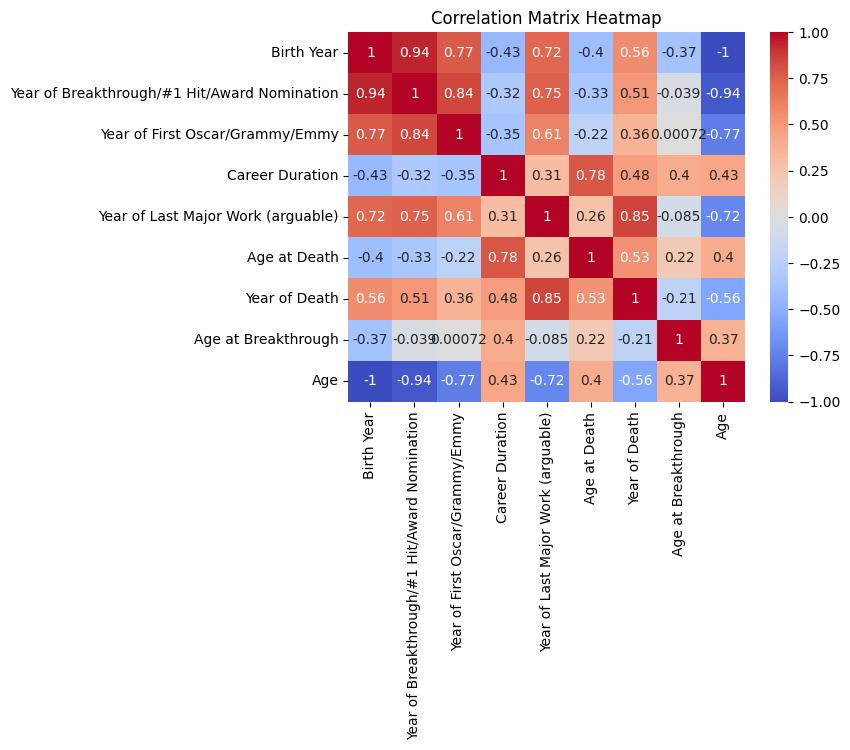

In [ ]:
import seaborn as sns

# Plot a heatmap of the correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# Calculate summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)


        Birth Year  Year of Breakthrough/#1 Hit/Award Nomination  \
count    70.000000                                     70.000000   
mean   1935.585714                                   1964.228571   
std      24.135783                                     22.411935   
min    1889.000000                                   1915.000000   
25%    1916.000000                                   1949.500000   
50%    1935.500000                                   1963.500000   
75%    1954.000000                                   1983.500000   
max    1988.000000                                   2008.000000   

       Year of First Oscar/Grammy/Emmy  Career Duration  \
count                        64.000000        70.000000   
mean                       1976.234375        63.385714   
std                          22.170152        17.512971   
min                        1929.000000        24.000000   
25%                        1962.000000        53.500000   
50%                        1978.0